In [1]:
import numpy as np
from glob import glob
from tensorflow.keras.models import load_model
from ztfrapid import ztf_rapid

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [12]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
files = np.load('/home/miranda/ztf-rapid/data/processed/test_01.npz')

In [4]:
[key for key in files.keys()]

['X_train_res',
 'X_test',
 'y_train_res',
 'y_test',
 'objids_test',
 'class_names']

In [5]:
model_filepaths = glob('/home/miranda/ztf-rapid/models/test_*')

In [6]:
models = [load_model(path) for path in model_filepaths]

In [7]:
y_pred_list = [ztf_rapid.predict(model, files['X_test']) for model in models]

In [8]:
y_true, y_pred = ztf_rapid.true_pred_ensemble(
    files['y_test'], 
    y_pred_list, 
    files['objids_test'], 
    files['class_names'], 
    cutoff=0.75)

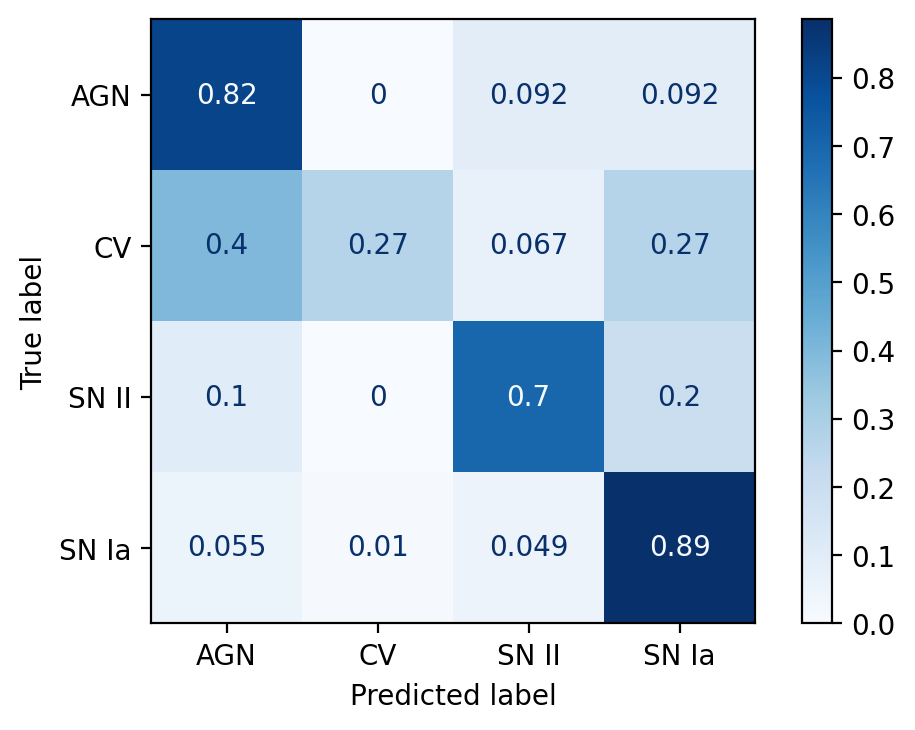

In [13]:
ztf_rapid.plot_confusion_matrix(y_true, y_pred, files['class_names'])